In [1]:
pip install pandas numpy matplotlib seaborn jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.4 MB/s eta 0:00:00


In [2]:
pip install prophet plotly streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.6 MB/s eta 0:00:00


In [7]:
from google.colab import files
uploaded = files.upload()


Saving Amazon_Sale_dataset.csv to Amazon_Sale_dataset.csv


In [9]:
import pandas as pd

df = pd.read_csv("Amazon_Sale_dataset.csv")
print(df.head())


   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [13]:
#  INSTALL REQUIRED LIBRARIES
!pip install pandas numpy matplotlib seaborn plotly

#  IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#  LOAD DATASET
df = pd.read_csv("Amazon_Sale_dataset.csv")

#  QUICK OVERVIEW
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

# 🧹 DATA CLEANING
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Convert 'date' to datetime
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Convert 'amount' and 'qty' to numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
df['qty'] = pd.to_numeric(df['qty'], errors='coerce')

# Create sales column
df['sales'] = df['amount'] * df['qty']

# Drop rows with no sales value
df = df.dropna(subset=['sales'])

#  BASIC KPIs
total_orders = df['order_id'].nunique() if 'order_id' in df.columns else len(df)
total_sales = df['sales'].sum()
avg_order_value = df['sales'].mean()
total_qty = df['qty'].sum()

print(f"\n BASIC KPIs")
print(f"Total Orders: {total_orders}")
print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Average Order Value: ₹{avg_order_value:,.2f}")
print(f"Total Quantity Sold: {total_qty}")


Shape: (128976, 21)

Columns: ['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS']

Missing Values:
 index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64

 BASIC KPIs
Total Orders: 112887
Total Sales: ₹76,031,267.00
Ave

/tmp/ipython-input-3970872068.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


/tmp/ipython-input-2010671731.py:19: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)
/tmp/ipython-input-2010671731.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)


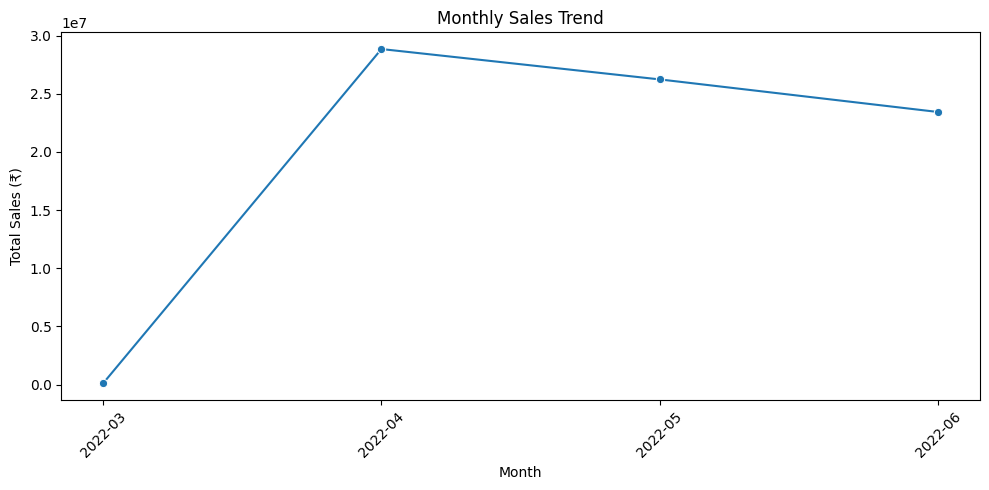

Average monthly sales: 19647542.56
Best month: 2022-04


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean
df = pd.read_csv("Amazon_Sale_dataset.csv")

# Clean Amount
df['Amount'] = (
    df['Amount']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.strip()
)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Parse date safely
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)

# Drop missing
df = df.dropna(subset=['Date', 'Amount'])

# Monthly trend - use datetime, not Period
df['Month'] = df['Date'].dt.to_period('M').astype(str)  # ✅ Convert to string

monthly_sales = df.groupby('Month', as_index=False)['Amount'].sum()

# Plot
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_sales, x='Month', y='Amount', marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Summary
print("Average monthly sales:", round(monthly_sales['Amount'].mean(), 2))
print("Best month:", monthly_sales.loc[monthly_sales['Amount'].idxmax(), 'Month'])


/tmp/ipython-input-3892474717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_r')


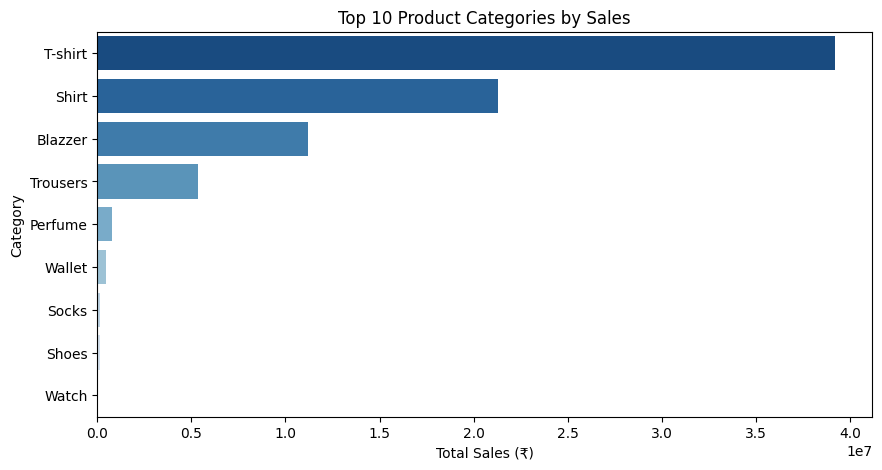

/tmp/ipython-input-3892474717.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Size'], order=df['Size'].value_counts().index, palette='viridis')


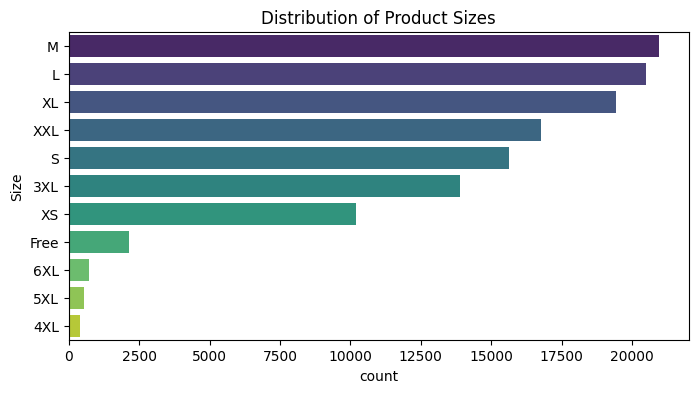

/tmp/ipython-input-3892474717.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=qty_per_cat.values, y=qty_per_cat.index, palette='mako')


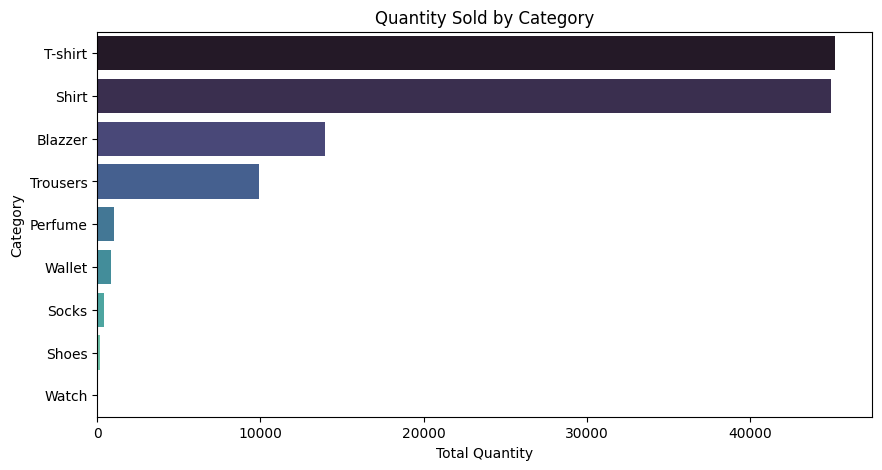

In [19]:
# Top product categories
top_categories = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_r')
plt.title("Top 10 Product Categories by Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Category")
plt.show()

# Size distribution
if 'Size' in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(y=df['Size'], order=df['Size'].value_counts().index, palette='viridis')
    plt.title("Distribution of Product Sizes")
    plt.show()

# Quantity sold per category
qty_per_cat = df.groupby('Category')['Qty'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=qty_per_cat.values, y=qty_per_cat.index, palette='mako')
plt.title("Quantity Sold by Category")
plt.xlabel("Total Quantity")
plt.ylabel("Category")
plt.show()


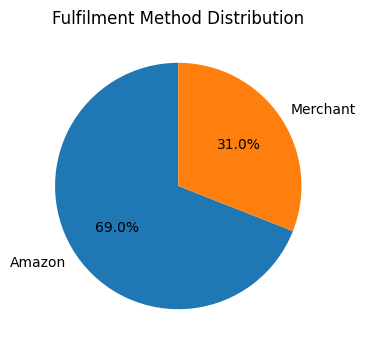

/tmp/ipython-input-966092798.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_fulfil.values, y=avg_sales_fulfil.index, palette='coolwarm')


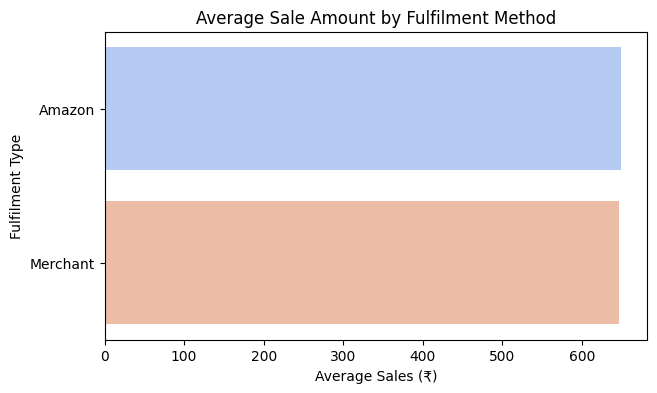

In [20]:
# Fulfilment distribution
plt.figure(figsize=(6,4))
df['Fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Fulfilment Method Distribution")
plt.ylabel("")
plt.show()

# Average sales by fulfilment
avg_sales_fulfil = df.groupby('Fulfilment')['Amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(7,4))
sns.barplot(x=avg_sales_fulfil.values, y=avg_sales_fulfil.index, palette='coolwarm')
plt.title("Average Sale Amount by Fulfilment Method")
plt.xlabel("Average Sales (₹)")
plt.ylabel("Fulfilment Type")
plt.show()


/tmp/ipython-input-948139068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sales Channel', data=df, palette='pastel')


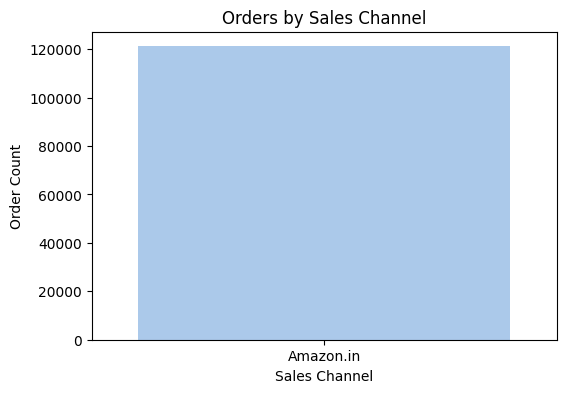

/tmp/ipython-input-948139068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_avg.values, y=state_avg.index, palette='crest')


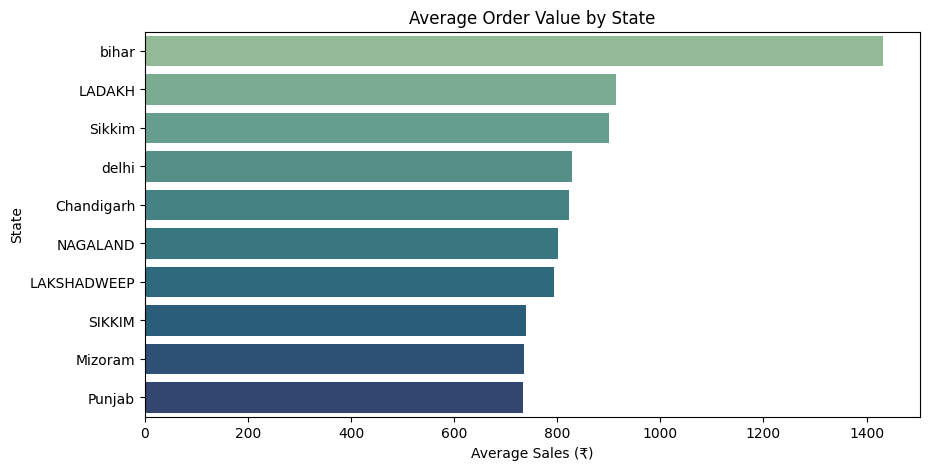

High-value customers (transactions > median): 60541
B2B Transactions: 0


In [21]:
# Segmentation by channel
plt.figure(figsize=(6,4))
sns.countplot(x='Sales Channel', data=df, palette='pastel')
plt.title("Orders by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Order Count")
plt.show()

# Average order value by state
state_avg = df.groupby('ship-state')['Amount'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=state_avg.values, y=state_avg.index, palette='crest')
plt.title("Average Order Value by State")
plt.xlabel("Average Sales (₹)")
plt.ylabel("State")
plt.show()

# Behavior: High-value vs Low-value customers (B2B vs B2C)
if 'B2B' in df.columns:
    high_value = df[df['Amount'] > df['Amount'].median()]
    print("High-value customers (transactions > median):", len(high_value))
    print("B2B Transactions:", df[df['B2B'] == 'Y'].shape[0])


/tmp/ipython-input-203020832.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='flare')


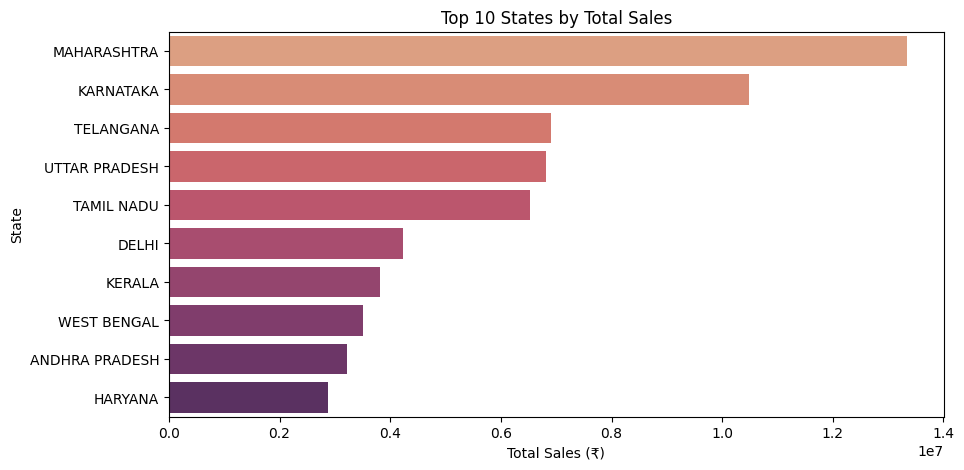

/tmp/ipython-input-203020832.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette='rocket')


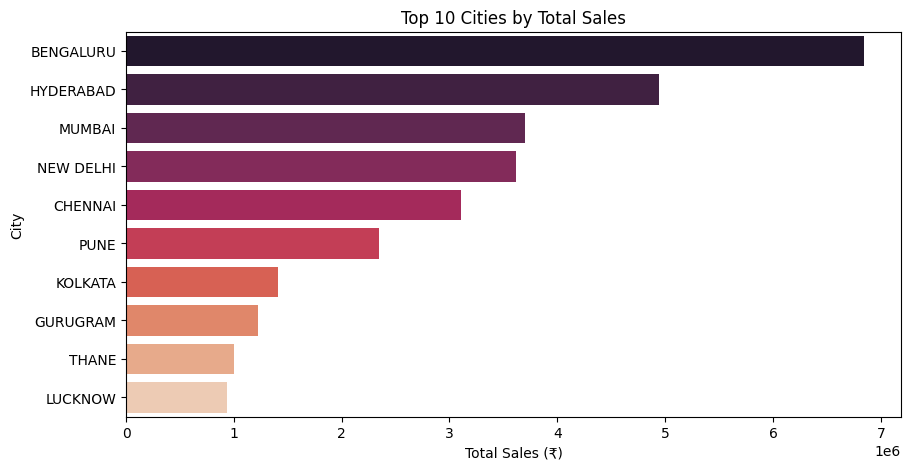

In [22]:
# State-wise sales
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='flare')
plt.title("Top 10 States by Total Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("State")
plt.show()

# City-wise sales
city_sales = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=city_sales.values, y=city_sales.index, palette='rocket')
plt.title("Top 10 Cities by Total Sales")
plt.xlabel("Total Sales (₹)")
plt.ylabel("City")
plt.show()


In [23]:
# Simple data-driven insights
total_sales = df['Amount'].sum()
top_category = df.groupby('Category')['Amount'].sum().idxmax()
best_state = df.groupby('ship-state')['Amount'].sum().idxmax()
cancel_rate = (df['Status'].str.contains('Cancelled', case=False, na=False).sum() / len(df)) * 100

print("BUSINESS INSIGHTS")
print("-----------------")
print(f"Total Sales: ₹{total_sales:,.2f}")
print(f"Top Selling Category: {top_category}")
print(f"Best Performing State: {best_state}")
print(f"Cancellation Rate: {cancel_rate:.2f}%")

print("\nRECOMMENDATIONS")
print("- Focus marketing on top 3 states for higher ROI.")
print("- Optimize inventory for high-selling categories.")
print("- Investigate causes behind cancellations to reduce loss.")
print("- Encourage B2B partnerships if they yield higher order values.")
print("- Analyze fulfilment delays or returns to improve logistics efficiency.")


BUSINESS INSIGHTS
-----------------
Total Sales: ₹78,590,170.25
Top Selling Category: T-shirt
Best Performing State: MAHARASHTRA
Cancellation Rate: 8.88%

RECOMMENDATIONS
- Focus marketing on top 3 states for higher ROI.
- Optimize inventory for high-selling categories.
- Investigate causes behind cancellations to reduce loss.
- Encourage B2B partnerships if they yield higher order values.
- Analyze fulfilment delays or returns to improve logistics efficiency.


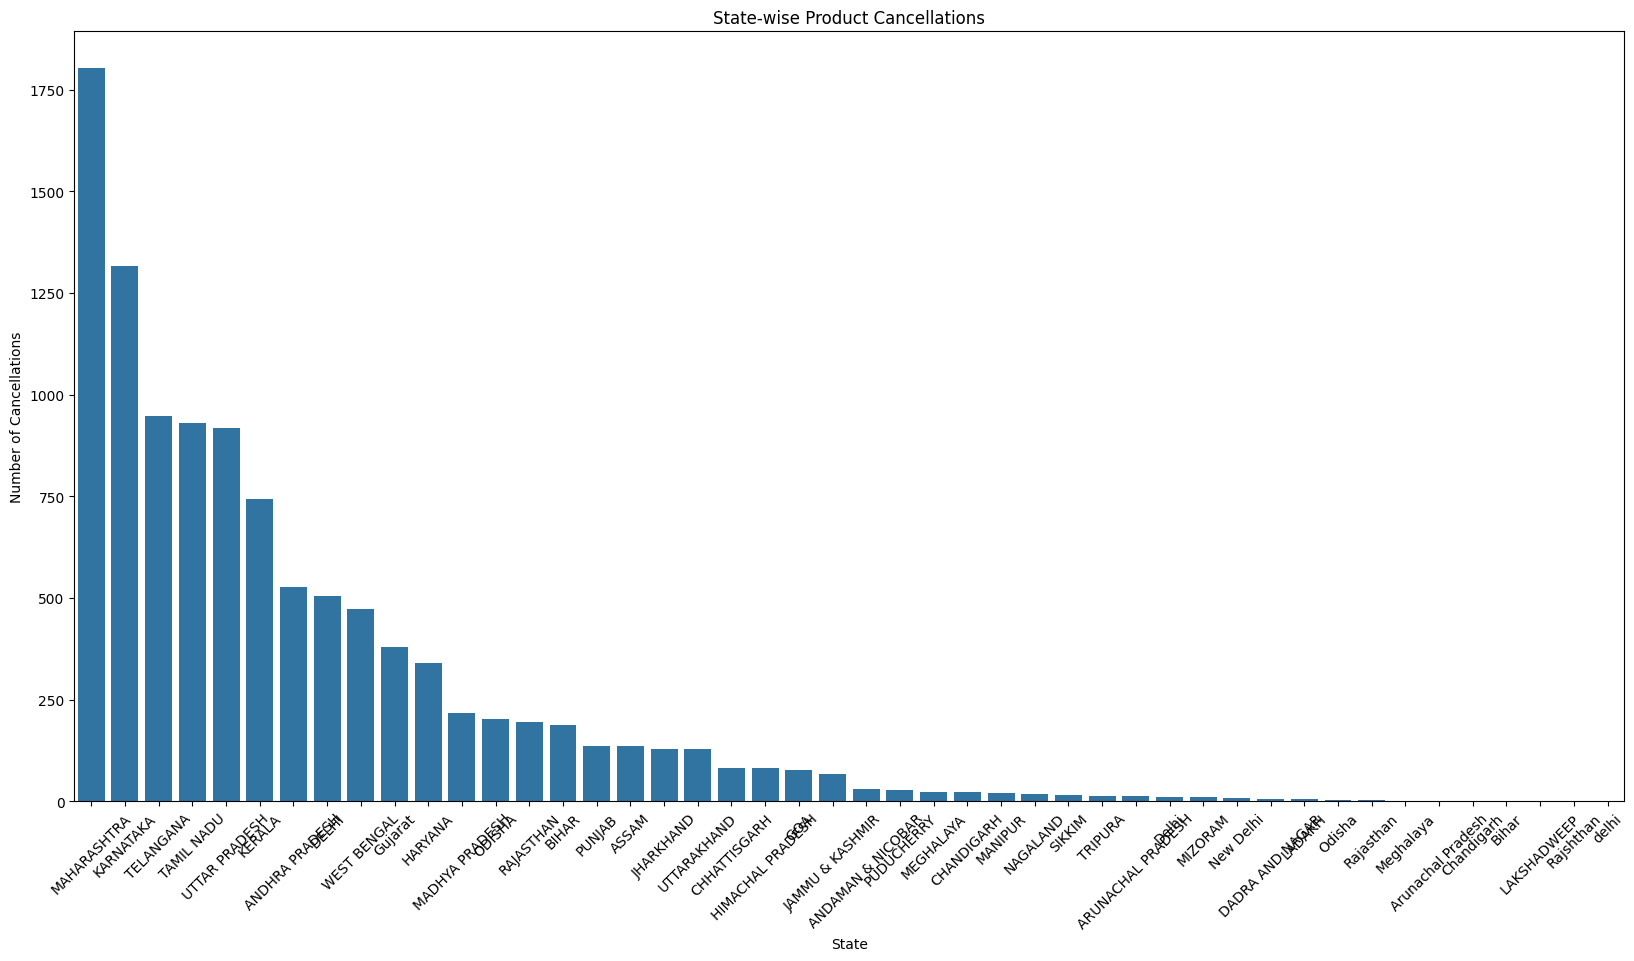

In [29]:
# State-wise product cancellation count
cancel_state = df[df['Status'] == 'Cancelled'].groupby('ship-state')['Order ID'].count().reset_index().sort_values(by='Order ID', ascending=False)

plt.figure(figsize=(20,10))
sns.barplot(data=cancel_state, x='ship-state', y='Order ID')
plt.title("State-wise Product Cancellations")
plt.xlabel("State")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=45)
plt.show()


In [30]:
# Filter cancelled orders from merchants
cancelled_merchant = df[(df['Status'] == 'Cancelled') & (df['Fulfilment'] == 'Merchant')]

# Check how many have price > 500
high_price_cancel = cancelled_merchant[cancelled_merchant['Amount'] > 500]

# Count and percentage
count_high = len(high_price_cancel)
total_cancel_merchant = len(cancelled_merchant)
percentage_high = (count_high / total_cancel_merchant) * 100 if total_cancel_merchant > 0 else 0

print(f"Total cancelled merchant orders: {total_cancel_merchant}")
print(f"Cancelled merchant orders with price > 500: {count_high} ({percentage_high:.2f}%)")


Total cancelled merchant orders: 5134
Cancelled merchant orders with price > 500: 3225 (62.82%)


/tmp/ipython-input-3261862868.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancelled_merchant['Price_Category'] = cancelled_merchant['Amount'].apply(lambda x: '>500' if x > 500 else '<=500')


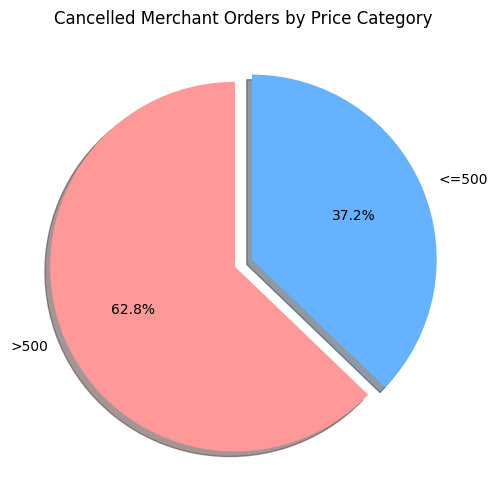

In [31]:
import matplotlib.pyplot as plt

# Categorize based on price
cancelled_merchant['Price_Category'] = cancelled_merchant['Amount'].apply(lambda x: '>500' if x > 500 else '<=500')

# Plot pie chart
plt.figure(figsize=(6,6))
cancelled_merchant['Price_Category'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    explode=(0.05, 0.05),
    colors=['#FF9999', '#66B2FF']
)

plt.title("Cancelled Merchant Orders by Price Category")
plt.ylabel('')
plt.show()


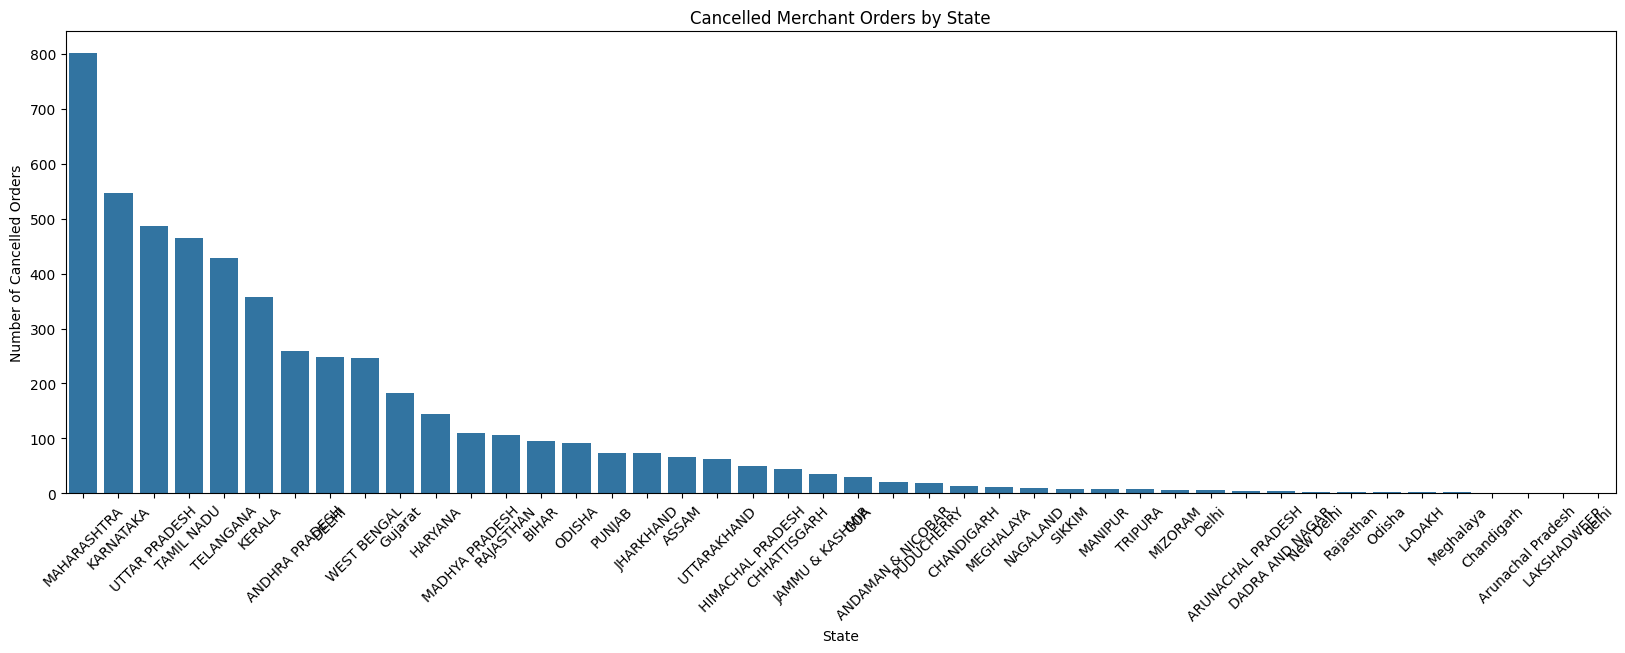

Top 5 States with Most Merchant Cancellations:
            State  Cancelled_Orders
23    MAHARASHTRA               801
18      KARNATAKA               546
40  UTTAR PRADESH               486
37     TAMIL NADU               464
38      TELANGANA               428


In [33]:
# Group by state to see where cancellations are happening most
cancel_state = cancelled_merchant.groupby('ship-state')['Order ID'].count().reset_index()
cancel_state.columns = ['State', 'Cancelled_Orders']

# Sort descending
cancel_state = cancel_state.sort_values(by='Cancelled_Orders', ascending=False)

# Plot
plt.figure(figsize=(20,6))
sns.barplot(data=cancel_state, x='State', y='Cancelled_Orders')
plt.title("Cancelled Merchant Orders by State")
plt.xlabel("State")
plt.ylabel("Number of Cancelled Orders")
plt.xticks(rotation=45)
plt.show()

# Optional: print top 5 states
print("Top 5 States with Most Merchant Cancellations:")
print(cancel_state.head())


In [36]:
import pandas as pd
import numpy as np

# Example: df = pd.read_csv("Amazon_Sales_Report.csv")

# Clean and parse dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Group by customer to build features
customer_df = df.groupby('ship-state').agg({
    'Order ID': 'nunique',  # total orders
    'Amount': 'sum',        # total amount spent
    'Qty': 'sum',           # total items purchased
    'Status': lambda x: (x == 'Cancelled').sum(),  # cancellations
    'Date': ['min', 'max']  # first and last order
}).reset_index()

# Rename columns
customer_df.columns = ['ship-state', 'Total Orders', 'Total Amount', 'Total Qty',
                       'Cancelled Orders', 'First Order', 'Last Order']


In [49]:
# Calculate days since last order
latest_date = df['Date'].max()
customer_df['Days_Since_Last_Order'] = (latest_date - customer_df['Last Order']).dt.days

# Define churn (example: customers inactive for 90+ days)
customer_df['Churn'] = np.where(customer_df['Days_Since_Last_Order'] > 55, 1, 0)
customer_df['Churn'].value_counts()



,count
Churn,
0,62
1,6


In [50]:
X = customer_df[['Total Orders', 'Total Amount', 'Total Qty', 'Cancelled Orders', 'Days_Since_Last_Order']]
y = customer_df['Churn']


In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        37
           1       0.50      1.00      0.67         4

    accuracy                           0.90        41
   macro avg       0.75      0.95      0.80        41
weighted avg       0.95      0.90      0.92        41

